In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/meng/Desktop/csranking.txt',sep='\t')
ranking = data['Count']
faculty = data['Faculty']

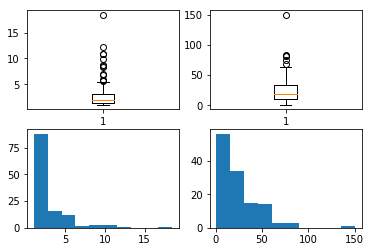

In [2]:
plt.figure(1)
plt.subplot(221)
plt.boxplot(ranking)
plt.subplot(222)
plt.boxplot(faculty)
plt.subplot(223)
plt.hist(ranking)
plt.subplot(224)
plt.hist(faculty)
plt.show()

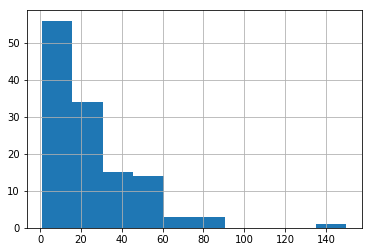

In [3]:
plt.figure(2)
pdhist = faculty.hist()
pdhist.plot(kind='bar')
plt.show()

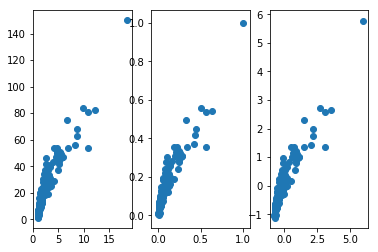

In [4]:
rankingM = (ranking-ranking.min())/(ranking.max()-ranking.min())
facultyM = (faculty-faculty.min())/(faculty.max()-faculty.min())
rankingZ = (ranking-ranking.mean())/ranking.std()
facultyZ = (faculty-faculty.mean())/faculty.std()

plt.figure(3)
plt.subplot(131)
pdscatter = plt.scatter(ranking,faculty)
plt.subplot(132)
pdscatter = plt.scatter(rankingM,facultyM)
plt.subplot(133)
pdscatter = plt.scatter(rankingZ,facultyZ)
plt.show()

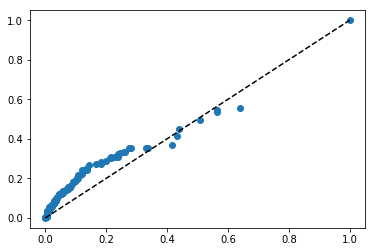

In [5]:
rankingM = (ranking-ranking.min())/(ranking.max()-ranking.min())
facultyM = (faculty-faculty.min())/(faculty.max()-faculty.min())

rankingS = rankingM.sort_values()
facultyS = facultyM.sort_values()

plt.figure(4)
plt.plot(rankingS,facultyS,'o')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [6]:
import math

def manhattan(a,b,n):
	ret = 0.0
	for i in range(n):
		ret += abs(a[i]-b[i])
	return ret

def euclidean(a,b,n):
	ret = 0.0
	for i in range(n):
		ret += (a[i]-b[i])*(a[i]-b[i])
	ret = math.sqrt(ret)
	return ret

def supremum(a,b,n):
	ret = 0.0
	for i in range(n):
		ret = max(ret,abs(a[i]-b[i]))
	return ret



In [7]:
A = np.array([[5,0,3,0,2,0],[3,0,2,0,1,1],[0,7,0,2,1,0],[0,1,0,0,1,3]])

dist = np.zeros([4,4])
for i in xrange(0,4):
	for j in xrange(0,4):
		x = A[i]
		y = A[j]
		dist[i][j] = manhattan(x,y,6)
print dist

[[  0.   5.  18.  13.]
 [  5.   0.  15.   8.]
 [ 18.  15.   0.  11.]
 [ 13.   8.  11.   0.]]


In [8]:
dist = np.zeros([4,4])
for i in xrange(0,4):
	for j in xrange(0,4):
		x = A[i]
		y = A[j]
		dist[i][j] = euclidean(x,y,6)
print dist

dist = np.zeros([4,4])
for i in xrange(0,4):
	for j in xrange(0,4):
		x = A[i]
		y = A[j]
		dist[i][j] = supremum(x,y,6)
print dist

[[ 0.          2.64575131  9.38083152  6.70820393]
 [ 2.64575131  0.          8.18535277  4.24264069]
 [ 9.38083152  8.18535277  0.          7.        ]
 [ 6.70820393  4.24264069  7.          0.        ]]
[[ 0.  2.  7.  5.]
 [ 2.  0.  7.  3.]
 [ 7.  7.  0.  6.]
 [ 5.  3.  6.  0.]]


In [9]:
from sklearn.metrics.pairwise import manhattan_distances
print manhattan_distances(A,A)

from sklearn.metrics.pairwise import euclidean_distances
print euclidean_distances(A,A)

from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances

dist = 1-pairwise_distances(A,metric='cosine')
print dist

[[  0.   5.  18.  13.]
 [  5.   0.  15.   8.]
 [ 18.  15.   0.  11.]
 [ 13.   8.  11.   0.]]
[[ 0.          2.64575131  9.38083152  6.70820393]
 [ 2.64575131  0.          8.18535277  4.24264069]
 [ 9.38083152  8.18535277  0.          7.        ]
 [ 6.70820393  4.24264069  7.          0.        ]]
[[ 1.          0.96336399  0.04415108  0.0978232 ]
 [ 0.96336399  1.          0.03513642  0.31139958]
 [ 0.04415108  0.03513642  1.          0.32824398]
 [ 0.0978232   0.31139958  0.32824398  1.        ]]


In [10]:
normalized_df = np.sum(A**2,axis=-1)**0.5
print normalized_df
A = np.matrix([list(A[i]/normalized_df[i]) for i in range(0,4)])
print A
dist = A.dot(A.T)
print dist

[ 6.164414    3.87298335  7.34846923  3.31662479]
[[ 0.81110711  0.          0.48666426  0.          0.32444284  0.        ]
 [ 0.77459667  0.          0.51639778  0.          0.25819889  0.25819889]
 [ 0.          0.95257934  0.          0.27216553  0.13608276  0.        ]
 [ 0.          0.30151134  0.          0.          0.30151134  0.90453403]]
[[ 1.          0.96336399  0.04415108  0.0978232 ]
 [ 0.96336399  1.          0.03513642  0.31139958]
 [ 0.04415108  0.03513642  1.          0.32824398]
 [ 0.0978232   0.31139958  0.32824398  1.        ]]
